In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stumbleupon/test.tsv
/kaggle/input/stumbleupon/train.tsv
/kaggle/input/stumbleupon/sampleSubmission.csv
/kaggle/input/stumbleupon/raw_content.zip


In [2]:
#import os
#for dirname, _, filenames in os.walk('../input/stumbleupon'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

In [3]:
!ls

__notebook__.ipynb


#  **Data analysis.**

In [4]:
import pandas as pd
import numpy as np

In [5]:
raw_df = pd.read_csv('../input/stumbleupon/train.tsv', sep='\t')
df = raw_df.copy()
del df['framebased']
del df['urlid']
del df['alchemy_category_score']
df['is_news'] = df['is_news'].str.replace('?', '0').astype(int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [6]:
df.sample(2).T

,2690,6536
url,http://www.fashionserved.com/Gallery/Urban-Que...,http://www.ourbestbites.com/2010/10/easy-hallo...
boilerplate,"{""title"":""Urban Queens on Fashion Served urban...","{""title"":""Easy Halloween Party Food Our Best B..."
alchemy_category,business,?
avglinksize,2.670886,1.553968
commonlinkratio_1,0.60241,0.780564
commonlinkratio_2,0.39759,0.412226
commonlinkratio_3,0.108434,0.280564
commonlinkratio_4,0.072289,0.260188
compression_ratio,0.406528,0.444928
embed_ratio,0.0,0.0


In [7]:
df.label.mean()

0.5133198106828939

<AxesSubplot:ylabel='alchemy_category'>

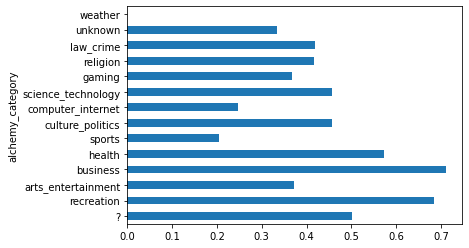

In [8]:
df.groupby('alchemy_category').label.agg(['mean', 'count']).sort_values('count', ascending=False)['mean'].plot.barh()

<AxesSubplot:>

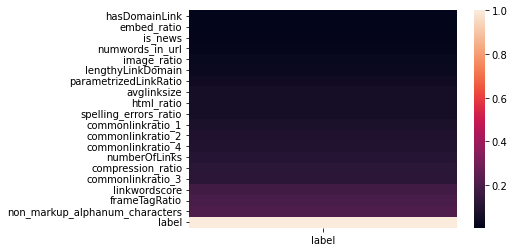

In [9]:
import seaborn as sns
sns.heatmap(df.corr('spearman').abs()[['label']].sort_values('label'))

<AxesSubplot:>

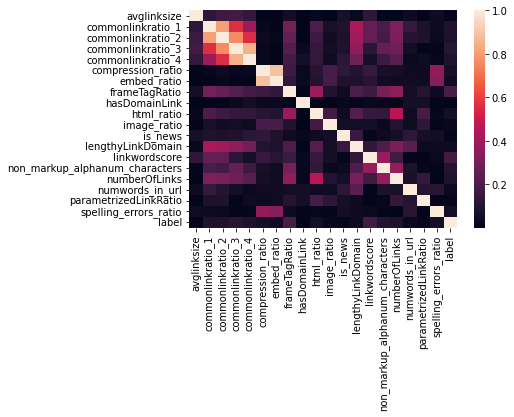

In [10]:
sns.heatmap(df.corr().abs())

<AxesSubplot:xlabel='label', ylabel='linkwordscore'>

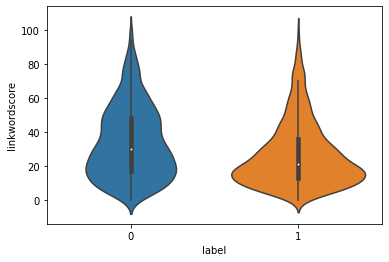

In [11]:
sns.violinplot(x='label', y='linkwordscore', data=df)

In [12]:
features_df = df.drop('label', axis=1)
num_features = features_df.select_dtypes(np.number)
num_features.sample(5)

,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,frameTagRatio,hasDomainLink,html_ratio,image_ratio,is_news,lengthyLinkDomain,linkwordscore,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio
1458,1.842912,0.503731,0.123134,0.052239,0.018657,0.482205,0.0,0.037037,0,0.190899,0.129496,1,1,36,4107,268,7,0.033582,0.089157
5800,1.946429,0.403509,0.087719,0.070175,0.017544,0.533237,0.0,0.125413,0,0.286715,0.094488,1,0,32,1127,57,0,0.017544,0.048387
5029,2.236364,0.454545,0.327273,0.181818,0.036364,0.584337,0.0,0.083612,0,0.243838,0.112245,0,1,28,1419,55,0,0.054545,0.076923
7006,2.425234,0.603509,0.473684,0.007018,0.000000,0.378462,0.0,0.013265,0,0.177243,0.036192,1,1,14,15895,285,4,0.343860,0.071203
6843,1.953488,0.586207,0.379310,0.103448,0.022989,0.394143,0.0,0.032836,0,0.236503,0.030207,1,0,20,3328,87,5,0.160920,0.085284


In [13]:
num_features.columns

Index(['avglinksize', 'commonlinkratio_1', 'commonlinkratio_2',
       'commonlinkratio_3', 'commonlinkratio_4', 'compression_ratio',
       'embed_ratio', 'frameTagRatio', 'hasDomainLink', 'html_ratio',
       'image_ratio', 'is_news', 'lengthyLinkDomain', 'linkwordscore',
       'non_markup_alphanum_characters', 'numberOfLinks', 'numwords_in_url',
       'parametrizedLinkRatio', 'spelling_errors_ratio'],
      dtype='object')

In [14]:
num_features.describe()

,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,frameTagRatio,hasDomainLink,html_ratio,image_ratio,is_news,lengthyLinkDomain,linkwordscore,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio
count,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000
mean,2.761823,0.468230,0.214080,0.092062,0.049262,2.255103,-0.103750,0.056423,0.021231,0.233778,0.275709,0.615551,0.660311,30.077079,5716.598242,178.754564,4.960649,0.172864,0.101221
std,8.619793,0.203133,0.146743,0.095978,0.072629,5.704313,0.306545,0.041446,0.144162,0.052487,1.919320,0.486498,0.473636,20.393101,8875.432430,179.466198,3.233111,0.183286,0.079231
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.045564,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.602062,0.340370,0.105263,0.022222,0.000000,0.442616,0.000000,0.028502,0.000000,0.201061,0.025900,0.000000,0.000000,14.000000,1579.000000,82.000000,3.000000,0.040984,0.068739
50%,2.088235,0.481481,0.202454,0.068627,0.022222,0.483680,0.000000,0.045775,0.000000,0.230564,0.083051,1.000000,1.000000,25.000000,3500.000000,139.000000,5.000000,0.113402,0.089312
75%,2.627451,0.616604,0.300000,0.133333,0.065065,0.578227,0.000000,0.073459,0.000000,0.260770,0.236700,1.000000,1.000000,43.000000,6377.000000,222.000000,7.000000,0.241299,0.112376
max,363.000000,1.000000,1.000000,0.980392,0.980392,21.000000,0.250000,0.444444,1.000000,0.716883,113.333333,1.000000,1.000000,100.000000,207952.000000,4997.000000,22.000000,1.000000,1.000000


In [15]:
cat_features = df.select_dtypes(include=[np.object])
cat_features = cat_features[['alchemy_category', 'news_front_page']]
cat_features.head(5)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


,alchemy_category,news_front_page
0,business,0
1,recreation,0
2,health,0
3,health,0
4,sports,0


In [16]:
pd.get_dummies(cat_features).head(5)

,alchemy_category_?,alchemy_category_arts_entertainment,alchemy_category_business,alchemy_category_computer_internet,alchemy_category_culture_politics,alchemy_category_gaming,alchemy_category_health,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather,news_front_page_0,news_front_page_1,news_front_page_?
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


# **Modeling.**

In [17]:
# More robust way to do feature pre-processing.
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

features_df = df.drop('label', axis=1)
FEATURE_COLUMNS = features_df.columns
NUM_FEATURES = features_df.select_dtypes(include=[np.number]).columns
CAT_FEATURES = ['alchemy_category', 'news_front_page']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)),
    ('scaler', StandardScaler()),
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('one_hot', OneHotEncoder(handle_unknown='ignore')),
])

preprocessor = ColumnTransformer(
  transformers=[
      ('num', numeric_transformer, NUM_FEATURES),
      ('cat', categorical_transformer, CAT_FEATURES)
  ])

In [18]:
features_df = preprocessor.fit_transform(df.drop('label', axis=1))
features_df.shape

(7395, 36)

In [19]:
features_df

array([[-0.08194111,  1.02520913, -0.05586734, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.10629082,  0.19589891,  0.50902122, ...,  1.        ,
         0.        ,  0.        ],
       [-0.04396462,  0.46172309,  0.73347932, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.08838666, -0.75049855, -0.29323563, ...,  1.        ,
         0.        ,  0.        ],
       [-0.20135342, -1.26873084, -1.10028781, ...,  0.        ,
         1.        ,  0.        ],
       [-0.18605119,  0.18553935,  1.46466303, ...,  0.        ,
         0.        ,  1.        ]])

In [20]:
target = df['label']
target.shape

(7395,)

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, target, test_size=0.25)

In [22]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier

baseline = DummyClassifier(strategy='most_frequent')
model = LogisticRegressionCV()
#model = RandomForestClassifier()

In [23]:
#baseline.fit(x_train, y_train)
model.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegressionCV()

In [24]:
from sklearn.metrics import classification_report
model_predictions = model.predict(x_test)

In [25]:
print(classification_report(y_test, model_predictions))

              precision    recall  f1-score   support

           0       0.65      0.60      0.62       885
           1       0.66      0.71      0.68       964

    accuracy                           0.66      1849
   macro avg       0.66      0.65      0.65      1849
weighted avg       0.66      0.66      0.65      1849



# **Submission.**

In [26]:
test_df = pd.read_csv('/kaggle/input/stumbleupon/test.tsv', sep='\t')
test_df['is_news'] = test_df['is_news'].str.replace('?', '0').astype(int) 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [27]:
sub_model = RandomForestClassifier()
sub_model.fit(features_df, target)

test_features = preprocessor.transform(test_df[df.drop('label', axis=1).columns])
predictions = sub_model.predict(test_features)

In [28]:
sub_df = pd.DataFrame({'urlid' : test_df.urlid, 'label': predictions})
sub_df.head()

,urlid,label
0,5865,1
1,782,0
2,6962,0
3,7640,0
4,3589,0


In [29]:
sub_df.to_csv('submission.csv', index=False)